<h2>Medical Image Processing of MRI scans using NumPy, pydicom, OpenCV, and matplotlib</h2>

In [1]:
pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.


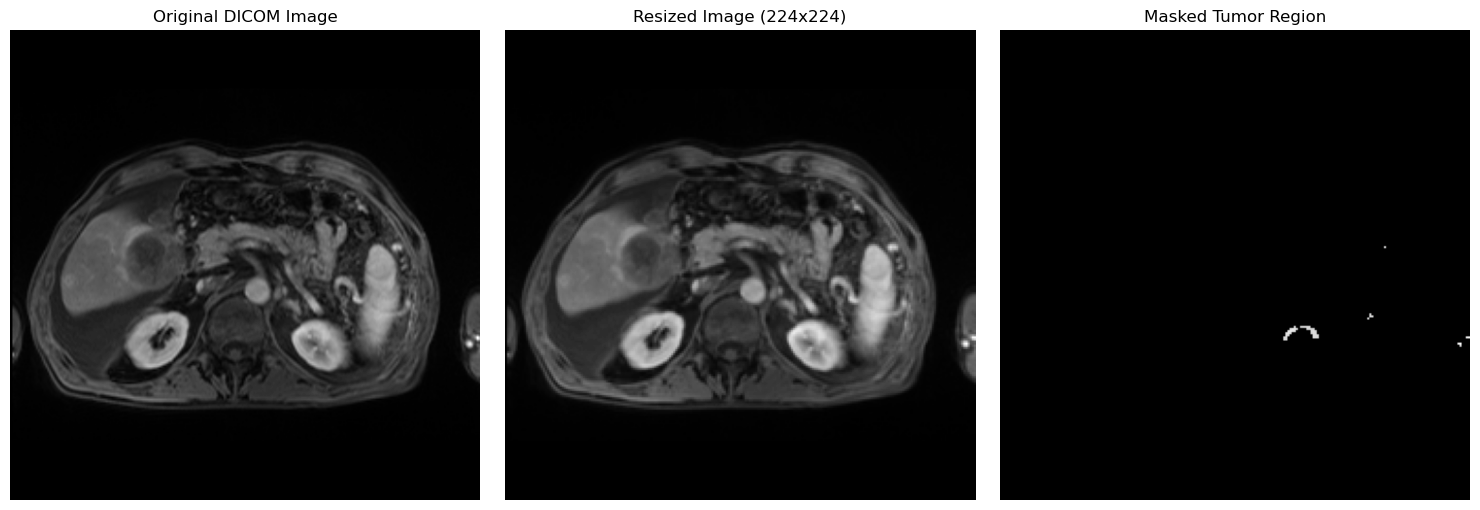

In [2]:
import pydicom
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the DICOM image
dicom_path = "mri_sample.dcm"
ds = pydicom.dcmread(dicom_path)
pixel_array = ds.pixel_array

# Step 2: Normalize the image to [0, 255]
image = pixel_array.astype(np.float32)
image = 255 * (image - np.min(image)) / (np.max(image) - np.min(image))
image = image.astype(np.uint8)

# Step 3: Resize the image for CNN input (e.g., 224x224)
resized_image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

# Step 4: Mask bright areas (potential tumors)
# Threshold (can be tuned): assume anything above 180 is anomaly
threshold_value = 180
mask = np.where(resized_image > threshold_value, 255, 0).astype(np.uint8)

# Step 5: Apply mask to original resized image
masked_image = cv2.bitwise_and(resized_image, resized_image, mask=mask)

# Step 6: Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original DICOM Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Resized Image (224x224)")
plt.imshow(resized_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Masked Tumor Region")
plt.imshow(masked_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
